In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import odeint

[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588478e-02
  4.50516634e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399844e-02
  5.86293757e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484043e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281013e-02
  9.71899167e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080911e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653865e-02
  1.53831247e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559870e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113256e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981570e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220561e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518000e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

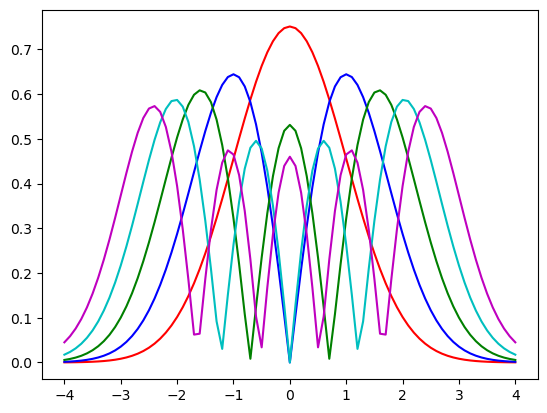

In [6]:
############## part a #################
tol = 1e-4 ;col = ['r', 'b', 'g', 'c', 'm']
L = 4 
K = 1
y_init = 1
dx = 0.1
xspan = np.arange(-L, L + dx, dx) 
A1 = np.zeros((len(xspan), 5))
A2 = np.zeros(5)         

def shoot(y, x, epsilon, K):
    return [y[1], (K * x**2 - epsilon) * y[0]]

eps_start = 0.1

for modes in range(1, 6):
    epsilon = eps_start
    deps = 0.2
    for _ in range(1000):    
        y_dash_init = np.sqrt(K * L**2 - epsilon)
        y0 = [1, y_dash_init]
        y = odeint(shoot, y0, xspan, args = (epsilon, K)) 

        if abs(y[-1, 1] + np.sqrt((L**2) - epsilon) * y[-1, 0]) < tol:  # check for convergence
            A2[modes - 1] = epsilon
            A1[: , modes - 1] = y[: ,0]
            break
        
        if ((-1)**(modes + 1)) * (y[-1, 1] + np.sqrt((L * L) - epsilon)*y[-1, 0]) > 0:
            epsilon += deps
        else:
            epsilon -= deps
            deps /= 2

    eps_start = epsilon + 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xspan)  # calculate the normalization
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes - 1])  # plot modes

for i in range(5):
    norm = np.trapz(A1[:, i] * A1[:, i], xspan)
    A1[:, i] = abs(A1[:, i]/np.sqrt(norm))

print(A1)

[[5.25330699e-04 2.98456752e-03 1.16813848e-02 3.63684946e-02
  9.51957970e-02]
 [5.65512105e-04 3.17867592e-03 1.23103575e-02 3.79292078e-02
  9.82713969e-02]
 [6.86056325e-04 3.76100113e-03 1.41972756e-02 4.26113473e-02
  1.07498197e-01]
 [8.98810812e-04 4.77370376e-03 1.74256365e-02 5.04721278e-02
  1.22626002e-01]
 [1.22563002e-03 6.29686622e-03 2.21697827e-02 6.17193919e-02
  1.43565545e-01]
 [1.69904226e-03 8.44739559e-03 2.86805487e-02 7.66572358e-02
  1.70261204e-01]
 [2.36360740e-03 1.13795761e-02 3.72731192e-02 9.56346180e-02
  2.02574461e-01]
 [3.27778429e-03 1.52862080e-02 4.83140093e-02 1.18991694e-01
  2.40173697e-01]
 [4.51615457e-03 2.03994049e-02 6.22047465e-02 1.47000883e-01
  2.82430861e-01]
 [6.17184584e-03 2.69901636e-02 7.93603578e-02 1.79801729e-01
  3.28329688e-01]
 [8.35897169e-03 3.53658252e-02 1.00181301e-01 2.17330662e-01
  3.76393521e-01]
 [1.12148676e-02 4.58645543e-02 1.25018106e-01 2.59248830e-01
  4.24643293e-01]
 [1.49018556e-02 5.88460055e-02 1.541287

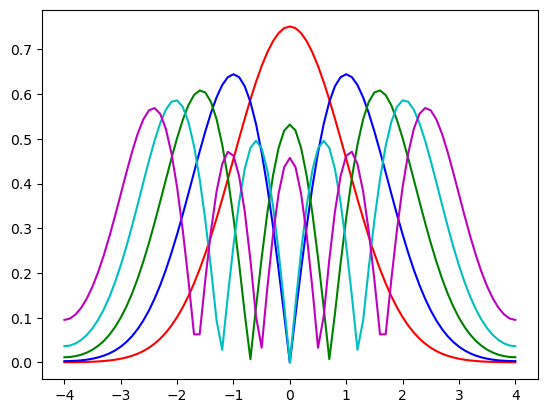

In [7]:
########### part b ###############
from scipy.sparse.linalg import eigs
L = 4
xspan = np.arange(-L, L + dx, dx) 
dx = xspan[1] - xspan[0]

N = len(xspan) #81
n = N - 2 #79
A3 = np.zeros((N, 5))
A4 = np.zeros(5)         
A = np.zeros((n, n)) 

for i in range(n):
    A[i, i] = -2 - (K * dx**2 * xspan[i + 1]**2)

    if i < (n-1):
        A[i, i+1] = 1
        A[i+1, i] = 1

A[0, 0] += 4/3 
A[0, 1] += -1/3
A[-1, -2] += -1/3
A[-1, -1] += 4/3

eigenvalues, eigenvectors = eigs(-A, k = 5, which = 'SM')
eigenvalues = eigenvalues.real
A4 = eigenvalues / (dx**2)

eigenvectors = eigenvectors.real
phi1 = eigenvectors[0, :]
phi2 = eigenvectors[1, :]
phi_n1 = eigenvectors[-1, :]
phi_n2 = eigenvectors[-2, :]

phi0 = 4/3 * phi1 - 1/3 * phi2
phin = 4/3 * phi_n1 - 1/3 * phi_n2

A3 = np.vstack([phi0, eigenvectors, phin])

for i in range(5):
    norm = np.trapz(abs(A3[:, i])**2, xspan)
    A3[:, i] = abs(A3[:, i]/np.sqrt(norm))
    plt.plot(xspan, A3[:, i], col[i]) 

print(A3)

#print("This is A4: ", A4)
# print("This is A2: ", A2)
# print("This is A3: ", A3)
# print("This is A1: ", A1)


In [8]:
############ part c ############
from scipy.integrate import solve_ivp
from scipy.integrate import simpson

L1 = 2
xspan_2 = np.arange(-L1, L1 + dx, dx) 
n = len(xspan_2)
tol = 1e-4

### for pos gamma 0.05
A5 = np.zeros((len(xspan_2), 2))
A6 = np.zeros(2)   
### for neg gamma -0.05    
A7 = np.zeros((len(xspan_2), 2))
A8 = np.zeros(2)         

def shoot_2(x, y, epsilon, gamma):
    return [y[1], (gamma * y[0]**2 + K * x**2 - epsilon) * y[0]]

for gamma in [0.05, -0.05]:
    e0 = 0.1
    A = 1e-6

    for modes in range(1, 3):
        dA = 0.01
        
        for j in range(100): #A loop
            epsilon = e0
            de = 0.2
            
            for i in range(100): #e loop
                y_dash_init = np.sqrt(L1**2 - epsilon)
                y0 = [A, y_dash_init * A]
                sol = solve_ivp(lambda x, y: shoot_2(x, y, epsilon, gamma), [xspan_2[0], xspan_2[-1]], y0, t_eval=xspan_2)
            
                y_arr = sol.y.T
                x_arr = sol.t

                bc = y_arr[-1, 1] + np.sqrt(K * (L1**2) - epsilon) * y_arr[-1, 0]
                if abs(bc) < tol:
                    break

                if (-1) ** (modes+1) * bc > 0:
                    epsilon += de
                else:
                    epsilon -= de
                    de /= 2

            area = np.trapz(y_arr[:, 0]**2, x = x_arr)
            if(abs(area - 1) < tol):
                break

            if area < 1:
                A += dA
            else:
                A -= dA
                dA /= 2

        e0 = epsilon + 0.2
        if (gamma > 0):
            A6[modes - 1] = epsilon
            A5[: , modes - 1] = abs(y_arr[: ,0])
            #plt.plot(xspan_2, A5[:, modes - 1]) 
        if (gamma < 0):
            A8[modes - 1] = epsilon
            A7[: , modes - 1] = abs(y_arr[: ,0])
            #plt.plot(xspan_2, A7[:, modes - 1])

print('This is A6 ', A6)
print('This is A8', A8)

This is A6  [1.01293945 2.92138672]
This is A8 [0.97404785 2.89309082]


In [18]:
########### part d ###########
def hw1_rhs_a(x, y, E):
    return [y[1], (x**2 - E) * y[0]]

L = 2
x_span = [-L, L]
E = 1
K = 1
y0 = [1, np.sqrt(K * L**2 - 1)]
TOL = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
dtRK45, dtRK23, dtRadau, dtBDF = [], [], [], []
A9 = np.zeros(4)

for tol in TOL:
    options = {'rtol': tol, 'atol': tol}
    solve45 = solve_ivp(hw1_rhs_a, x_span, y0, method='RK45', args=(E,), **options)
    solve23 = solve_ivp(hw1_rhs_a, x_span, y0, method='RK23', args=(E,), **options)
    solveRadau = solve_ivp(hw1_rhs_a, x_span, y0, method='Radau', args=(E,), **options)
    solveBDF = solve_ivp(hw1_rhs_a, x_span, y0, method='BDF', args=(E,), **options)

    t45 = solve45.t
    t23 = solve23.t
    tRadau = solveRadau.t
    tBDF = solveBDF.t

    dtRK45.append(np.mean(np.diff(t45)))
    dtRK23.append(np.mean(np.diff(t23)))
    dtRadau.append(np.mean(np.diff(tRadau)))
    dtBDF.append(np.mean(np.diff(tBDF)))
    # print(dtRK45)

fit45 = np.polyfit(np.log(dtRK45), np.log(TOL), 1)
fit23 = np.polyfit(np.log(dtRK23), np.log(TOL), 1)
fitRadau = np.polyfit(np.log(dtRadau), np.log(TOL), 1)
fitBDF = np.polyfit(np.log(dtBDF), np.log(TOL), 1)

A9[0] = fit45[0]
A9[1] = fit23[0]
A9[2] = fitRadau[0]
A9[3] = fitBDF[0]

A9 = A9.flatten()
print(A9)


[5.24466756 3.01909953 4.03819927 6.45751261]


[0.00999374 0.02996839 0.04991407 0.06980389 0.089506  ]
[0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]


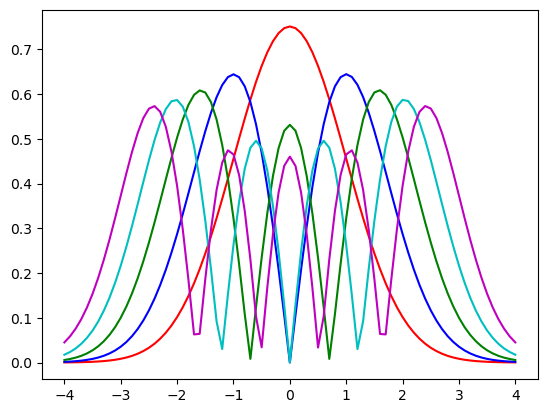

In [19]:
####### part e ################

### part a redo ###
tol = 1e-4 ;col = ['r', 'b', 'g', 'c', 'm']
L = 4 
y_init = 1
dx = 0.1
xspan = np.arange(-L, L + dx, dx) 
eigvec_numerical = np.zeros((len(xspan), 5))
eigval_numerical = np.zeros(5)         

def shoot(x, y, epsilon, K):
    return [y[1], (x**2 - epsilon) * y[0]]

eps_start = 0.1

for modes in range(1, 6):
    epsilon = eps_start
    deps = 0.2
    for _ in range(1000):    
        y_dash_init = np.sqrt(K * L**2 - epsilon)
        y0 = [1, y_dash_init]
        sol = solve_ivp(lambda x, y: shoot(x, y, epsilon, K), [xspan[0], xspan[-1]], y0, t_eval=xspan)
        y = sol.y.T
        x = sol.t

        if abs(y[-1, 1] + np.sqrt((L**2) - epsilon) * y[-1, 0]) < tol:  # check for convergence
            eigval_numerical[modes - 1] = epsilon
            eigvec_numerical[: , modes - 1] = y[: ,0]
            break
        
        if ((-1)**(modes + 1)) * (y[-1, 1] + np.sqrt((L * L) - epsilon)*y[-1, 0]) > 0:
            epsilon += deps
        else:
            epsilon -= deps
            deps /= 2

    eps_start = epsilon + 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xspan)  # calculate the normalization
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes - 1])  # plot modes

for i in range(5):
    norm = np.trapz(eigvec_numerical[:, i] * eigvec_numerical[:, i], xspan)
    eigvec_numerical[:, i] = abs(eigvec_numerical[:, i]/np.sqrt(norm))

print(eigenvalues)
x = np.arange(-L, L + dx, dx) 
h = np.array([np.ones_like(x), 2 * x, 4 * x**2 - 2, 8 * x**3 - 12*x, 16 * x**4 - 48 * x **2 + 12])
phi = np.zeros((len(h[0, :]), 5))

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

for j in range(5):
    phi[:, j] = (np.exp(-x**2 / 2) * (h[j, :] / np.sqrt(factorial(j) * (2**j) * np.sqrt(np.pi)))).T

er_psi_a = np.zeros(5)
er_psi_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

for j in range(5):
    er_psi_a[j] = np.trapz((abs(eigvec_numerical[:, j]) - abs(phi[:, j])) **2, x)
    er_psi_b[j] = np.trapz((abs(A3[:, j]) - abs(phi[:, j])) **2, x)
    er_a[j] = 100 * abs(eigval_numerical[j] - (2 * (j+1) - 1)) / (2 * (j+1) - 1)
    er_b[j] = 100 * abs(A4[j] - (2 * (j+1) - 1)) / (2 * (j+1) - 1)

A10 = er_psi_a
A12 = er_psi_b

A11 = er_a
A13 = er_b
# print(h[4, :])
print(A11)